In [8]:
import sys
sys.path.append('../src/data_analysis')
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
import re
import time
import json
from src.data_analysis import web_utilities
import df_utilities
from graphing import star_graph
%matplotlib inline 

ModuleNotFoundError: No module named 'src.data_analysis'

In [3]:
import sys
sys.path.append('../src/data_analysis')

In [4]:
sys.path

['/Users/tc/Documents/recruiting/swapi/fancy_graphing',
 '/usr/local/Cellar/apache-spark/2.2.0/libexec/python',
 '/Users/tc/Documents/recruiting/swapi/fancy_graphing',
 '/Users/tc/centosette/tdd/src',
 '/Users/tc/work/centosette/source/tdd/src',
 '/Users/tc/anaconda3/envs/hensel_phelps/lib/python37.zip',
 '/Users/tc/anaconda3/envs/hensel_phelps/lib/python3.7',
 '/Users/tc/anaconda3/envs/hensel_phelps/lib/python3.7/lib-dynload',
 '',
 '/Users/tc/anaconda3/envs/hensel_phelps/lib/python3.7/site-packages',
 '/Users/tc/anaconda3/envs/hensel_phelps/lib/python3.7/site-packages/IPython/extensions',
 '/Users/tc/.ipython',
 '../src/data_analysis']

In [ ]:
if not os.path.exists('../assets/dataframe.csv'):
    df = df_utilities.build_dataframe()
    df = df_utilities.cleanup(df)
    df.to_csv('../assets/dataframe.csv')
else: 
    df = pd.read_csv('../assets/dataframe.csv', index_col = 0)
    print("Dataframe loaded from .csv!")

In [3]:
worlds,world_counts = np.unique(df.homeworld, return_counts=True)
populous_worlds = worlds[np.where(world_counts>2)]
populous_worlds = list(populous_worlds)[:-1] + ['All Planets']
populous_worlds

['Alderaan', 'Coruscant', 'Kamino', 'Naboo', 'Tatooine', 'All Planets']

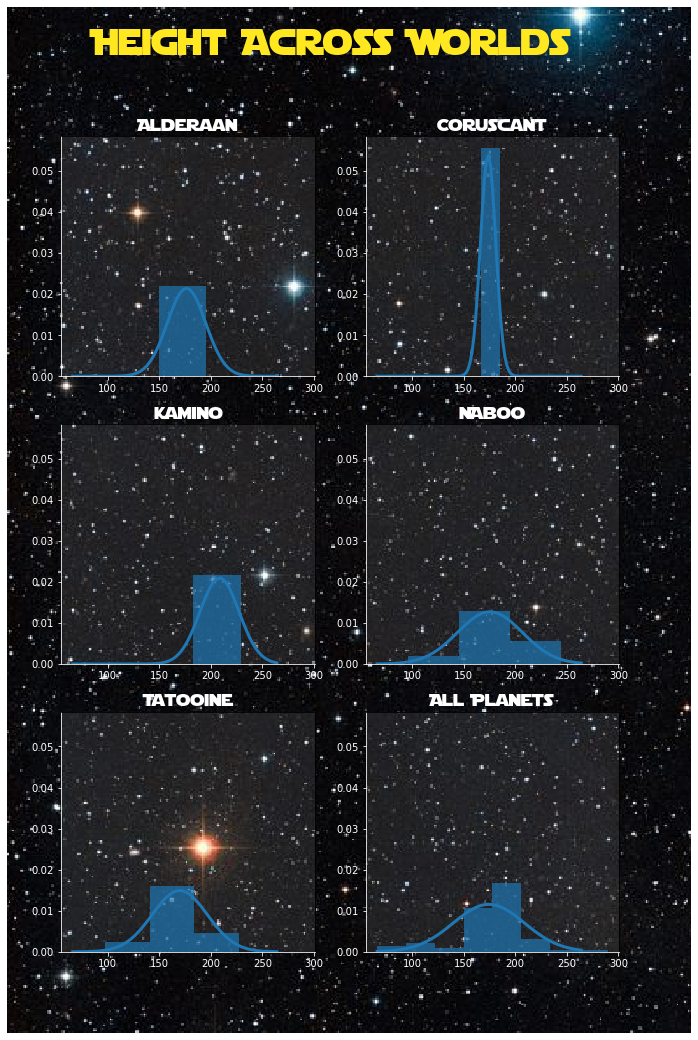

In [4]:
fig, ax = star_graph.plot_df_hist(df, 'homeworld',populous_worlds, 
                                  bin_val='scott', main_title="Height Across Worlds")

In [5]:
from src.data_analysis.jupyter_functions import get_unique_counts

species,species_count = get_unique_counts(df,'species')
common_species = species[np.where(species_count>2)][:-1]
common_species

array(['Droid', 'Gungan', 'Human'], dtype=object)

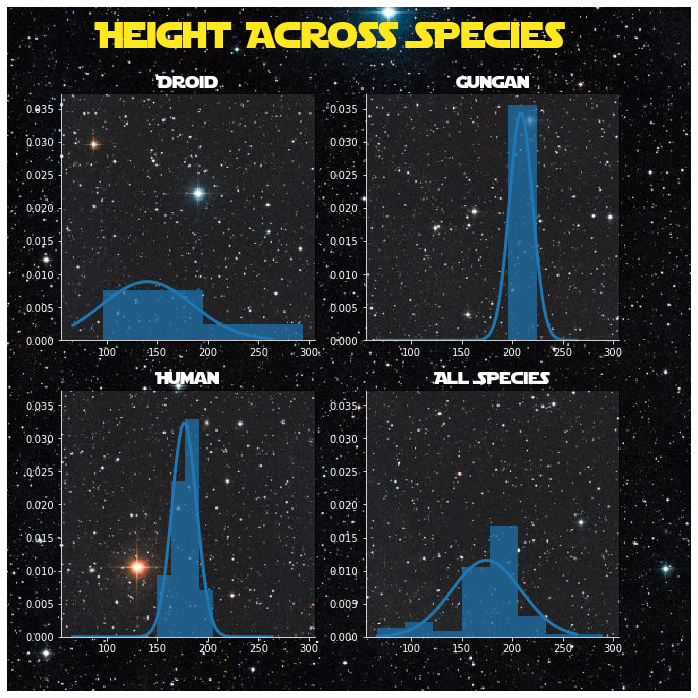

In [6]:
fig, ax = star_graph.plot_df_hist(df,'species',['Droid', 'Gungan', 'Human','All Species'],
                        bin_val='scott')

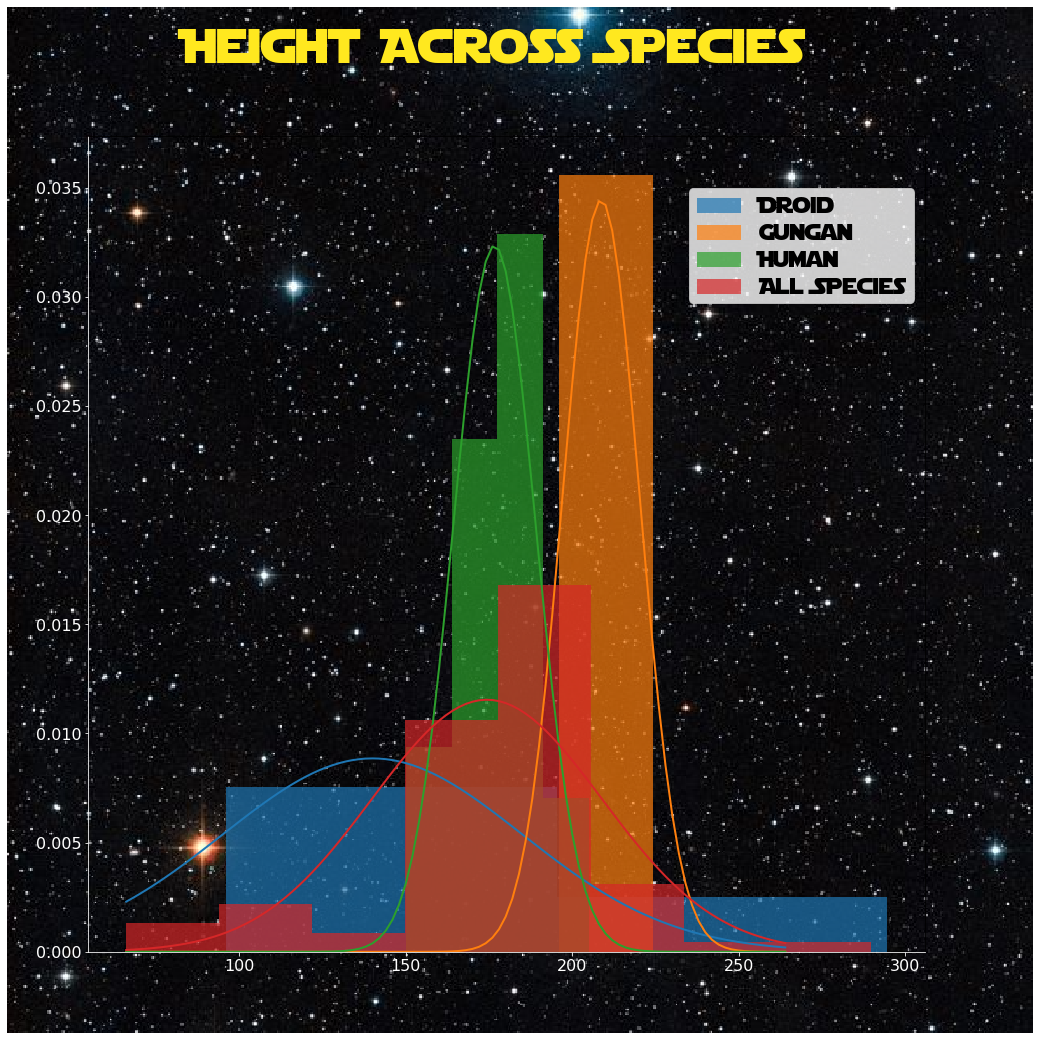

In [7]:
fig,ax = star_graph.plot_df_hist(df,'species',['Droid', 'Gungan', 'Human','All Species'], plot_type='single', 
                 bin_val='scott',graph_width=15,mt_size=48, main_title='Height Across Species')

In [8]:
logos = ['e1_logo','e2_logo','e3_logo','e4_logo','e5_logo','e6_logo','fa_logo',
         'r1_logo','last_jedi_logo','solo_logo']
posters = ['e1_poster','e2_poster','e3_poster','e4_poster','e5_poster','e6_poster','fa_poster',
           'r1_poster','last_jedi_poster','solo_poster']
movie_cols = ['A New Hope','The Empire Strikes Back','Return of the Jedi', 
              'The Phantom Menace','Attack of the Clones', 'Revenge of the Sith', 
              'The Force Awakens']

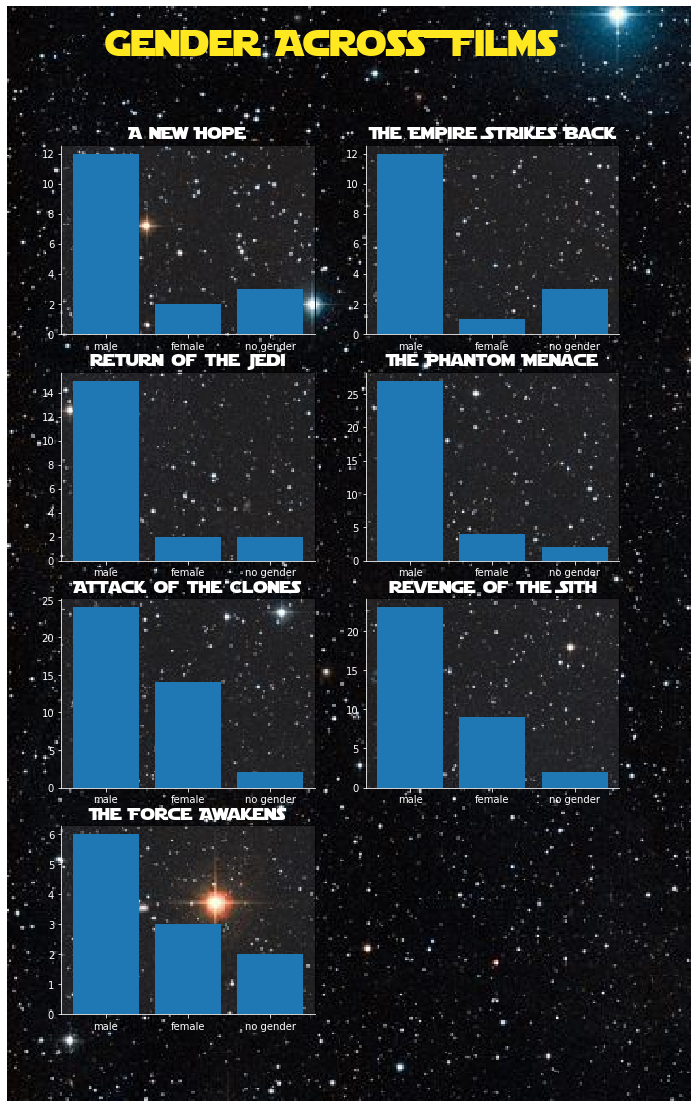

In [17]:
def get_gender_count(s):
    return [np.where(s == i)[0].shape[0] for i in ['male','female','no gender']]

fig = plt.figure(figsize = (10,16))
ax = []
img = star_graph.get_scaled_img(fig)
plt.imshow(img)
labels = ['male','female','no gender']
no_gender_count = 0
for v, i in enumerate(movie_cols):
    movie_mask =df[i]
    s = df[movie_mask]['gender']
    h = get_gender_count(s)
    ax.append(fig.add_subplot(4,2,v+1))
    ax[-1].bar(np.linspace(1,3,3), h, tick_label=labels)
    ax[-1].set_title(i)
    no_gender_count += h[2]
star_graph.make_it_cool(fig, movie_cols+['All Films'],[.05,.05,.95,.95], 'Gender Across+Films', 36)
